In [1]:
import pandas as pd

# Loading dataset

In [2]:
df = pd.read_csv("/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv")

# EDA

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [5]:
# one-hot encoding the column "type"

one_hot = pd.get_dummies(df.type)
df = df.join(one_hot)
df = df.drop("type", axis = 1)

In [6]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [7]:
df["nameOrig_type"] = df["nameOrig"].str[:1]

In [8]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameOrig_type
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,C
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,C
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C


In [9]:
df.nameOrig_type.unique()

array(['C'], dtype=object)

In [10]:
# dropping columns "nameOrig" and "nameOrig_type" since they are of no use for the model

df = df.drop("nameOrig", axis = 1)
df = df.drop("nameOrig_type", axis = 1)
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [11]:
df["nameDest_type"] = df["nameDest"].str[:1]
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C


In [12]:
df = df.drop("nameDest", axis = 1)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C


In [13]:
df.nameDest_type.unique()

array(['M', 'C'], dtype=object)

In [14]:
# one-hot encoding the column "nameDest_type"

one_hot = pd.get_dummies(df.nameDest_type)
df = df.join(one_hot)
df = df.drop("nameDest_type", axis = 1)

In [15]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False


In [16]:
# dropping column "M" as any one of "M" and "C" columns are eniugh as df.nameDest_type.unique() = 2
df = df.drop("M", axis = 1)

In [17]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True


In [18]:
# Fuunction for normalising the dataset

def norm_column(df, col):
  df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
  return df

In [19]:
# Normalising the dataset

norm_cols = [
    "step",
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest"
]

for col in norm_cols:
  norm_column(df, col)

In [20]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


In [21]:
df["isFraud"].sum()

8213

In [22]:
# Since there is a lot of class imbalance, so I am carrying out under-sampling process in the next 4 cells (including this one)

df_isFraud = df[df["isFraud"] == 1]
df_isFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True


In [23]:
df_isnotFraud = df[df["isFraud"] == 0]
df_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.000000,0.000106,0.002855,0.003233,0.00000,0.000000,0,0,False,False,False,True,False,False
1,0.000000,0.000020,0.000357,0.000391,0.00000,0.000000,0,0,False,False,False,True,False,False
4,0.000000,0.000126,0.000697,0.000603,0.00000,0.000000,0,0,False,False,False,True,False,False
5,0.000000,0.000085,0.000904,0.000929,0.00000,0.000000,0,0,False,False,False,True,False,False
6,0.000000,0.000077,0.003075,0.003551,0.00000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,0.966307,0.000093,0.008707,0.010289,0.00000,0.000000,0,0,False,False,False,True,False,False
6362320,0.966307,0.001722,0.000065,0.000000,0.00000,0.000447,0,0,False,True,False,False,False,True
6362321,0.966307,0.002015,0.002820,0.000000,0.00007,0.000593,0,0,False,True,False,False,False,True
6362322,0.966307,0.000888,0.000226,0.000000,0.00000,0.000230,0,0,False,False,False,False,True,True


In [24]:
df_isnotFraud = df_isnotFraud.sample(n = 8213)
df_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
745584,0.049865,2.317729e-03,0.000336,0.004725,0.000376,0.000000,0,0,True,False,False,False,False,True
5930261,0.543127,1.096743e-03,0.038122,0.047854,0.001033,0.000748,0,0,True,False,False,False,False,True
749082,0.049865,3.295047e-04,0.003614,0.003728,0.000000,0.000000,0,0,False,False,False,True,False,False
4754168,0.447439,1.814097e-03,0.000000,0.000000,0.000777,0.001248,0,0,False,True,False,False,False,True
2358688,0.254717,3.396478e-03,0.000000,0.000000,0.009728,0.010605,0,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311807,0.923181,1.938936e-04,0.009096,0.010569,0.000000,0.000000,0,0,False,False,False,True,False,False
4288353,0.412399,9.011135e-05,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
1963558,0.238544,3.037465e-07,0.000203,0.000245,0.000180,0.000180,0,0,True,False,False,False,False,True
5150122,0.479784,1.482203e-05,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False


In [25]:
df = pd.concat([df_isFraud, df_isnotFraud])
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.000000,1.957910e-06,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,1.957910e-06,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,3.035301e-05,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,3.035301e-05,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,2.177282e-04,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311807,0.923181,1.938936e-04,0.009096,0.010569,0.000000,0.000000,0,0,False,False,False,True,False,False
4288353,0.412399,9.011135e-05,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
1963558,0.238544,3.037465e-07,0.000203,0.000245,0.000180,0.000180,0,0,True,False,False,False,False,True
5150122,0.479784,1.482203e-05,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False


# Training, Cross-Validation & Testing Dataset Splitting

In [26]:
import sklearn
from sklearn.model_selection import train_test_split

y = df["isFraud"]
x = df.drop("isFraud", axis = 1)

x_train, x_test_cv, y_train, y_test_cv = train_test_split(x, y, test_size = 0.3)
x_test, x_cv, y_test, y_cv = train_test_split(x_test_cv, y_test_cv, test_size = 0.5)

In [27]:
x_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
4788522,0.463612,0.001794,0.000000,0.000000,0.000648,0.001114,0,False,True,False,False,False,True
603261,0.044474,0.002063,0.000168,0.000000,0.000641,0.001176,0,False,True,False,False,False,True
2778704,0.287062,0.001151,0.001786,0.000000,0.000000,0.000000,0,False,False,False,False,True,True
1835902,0.218329,0.000225,0.000901,0.000663,0.000000,0.000000,0,False,False,False,True,False,False
2907470,0.305930,0.001390,0.000000,0.000000,0.003189,0.003548,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150803,0.479784,0.003027,0.137371,0.170720,0.001075,0.000289,0,True,False,False,False,False,True
1740531,0.215633,0.000946,0.066956,0.082224,0.000876,0.000630,0,True,False,False,False,False,True
5188003,0.487871,0.070458,0.109315,0.000000,0.000000,0.018287,0,False,True,False,False,False,True
2994102,0.311321,0.015738,0.024417,0.000000,0.000781,0.004866,0,False,True,False,False,False,True


In [28]:
x_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
6194199,0.769542,0.002282,0.003540,0.000000,0.000060,0.000652,0,False,True,False,False,False,True
2208595,0.249326,0.000516,0.000355,0.000000,0.000000,0.000000,0,False,False,False,True,False,False
6357490,0.955526,0.000364,0.000564,0.000000,0.000000,0.000000,0,False,False,False,False,True,True
2520592,0.274933,0.001494,0.095790,0.117894,0.001171,0.000782,0,True,False,False,False,False,True
1855458,0.219677,0.017604,0.027312,0.000000,0.000000,0.000000,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262176,0.179245,0.000847,0.000324,0.000000,0.002950,0.003168,0,False,True,False,False,False,True
3452293,0.345013,0.002284,0.003544,0.000000,0.000164,0.000757,0,False,True,False,False,False,True
2477131,0.273585,0.002312,0.001829,0.000000,0.001190,0.001790,0,False,True,False,False,False,True
5649252,0.532345,0.000387,0.111596,0.134823,0.004292,0.004189,0,True,False,False,False,False,True


In [29]:
x_cv

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
1747836,0.215633,0.000907,0.000000,0.000000,0.002549,0.002783,0,False,True,False,False,False,True
3387425,0.342318,0.001024,0.000001,0.001912,0.003305,0.003037,0,True,False,False,False,False,True
5281042,0.500000,0.000980,0.000000,0.000000,0.001566,0.001820,0,False,True,False,False,False,True
5851498,0.540431,0.001979,0.000334,0.000000,0.013452,0.013959,0,False,True,False,False,False,True
6031027,0.637466,0.000506,0.000000,0.000000,0.003190,0.003320,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3959649,0.388140,0.002122,0.003292,0.000000,0.000543,0.001093,0,False,True,False,False,False,True
5996411,0.571429,0.004981,0.007727,0.000000,0.000000,0.000000,0,False,False,False,False,True,True
6145537,0.734501,0.000056,0.001219,0.001361,0.000000,0.000000,0,False,False,False,True,False,False
6308239,0.921833,0.005815,0.009021,0.000000,0.000000,0.000000,0,False,False,False,False,True,True


# Logistic Regression



In [30]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [31]:
# Create the model
lr_model = LogisticRegression(solver='liblinear', random_state=0)

# Fit the model
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [32]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [33]:
W = lr_model.coef_
b = lr_model.intercept_

In [34]:
b

array([-3.48206956])

In [35]:
W.shape

(1, 13)

In [36]:
W = W.flatten()
W

array([ 2.44782049,  5.60336345, 14.38395329, -1.96982394, -3.53831614,
       -2.97662425,  0.34596491, -4.89036674,  2.41103673, -1.02712395,
       -3.74956451,  3.7739489 ,  0.26749494])

In [37]:
y_train.iloc[0]

0

In [38]:
def cost_lr(y, W, b):
    cost = 0.0 
    for i in range(len(y)):
        z = np.dot(x.iloc[i], W) + b[0]
        y_sig = sigmoid(z)
        if y.iloc[i] == 1:
            cost += -np.log10(y_sig)
        else:
            cost += -np.log10(1 - y_sig)
    return cost      

In [39]:
J_train = cost_lr(y_train, W, b)
J_train

6989.29896553834

In [40]:
J_cv = cost_lr(y_cv, W, b)
J_cv

913.9627143115245

In [41]:
J_test = cost_lr(y_test, W, b)
J_test

915.413479592786

Since the cost for even the training data is very high so our model of ligistic regression is facing a problem of **HIGH BIAS**. 

We can do three things to solve this issue:
* Try regularization with a small value of lambda
* Try engineering more features which could be useful for detecting frauds

In [42]:
y_pred_lr = lr_model.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

precison_lr = precision_score(y_test, y_pred_lr)
print("Precision:", precison_lr)

recall_lr = recall_score(y_test, y_pred_lr)
print("Recall:", recall_lr)

f1_lr = 2 * (precison_lr * recall_lr) / (precison_lr + recall_lr)
print("F1 Score:", f1_lr)

Accuracy: 0.8007305194805194
Precision: 0.7663551401869159
Recall: 0.8652597402597403
F1 Score: 0.8128097598170034


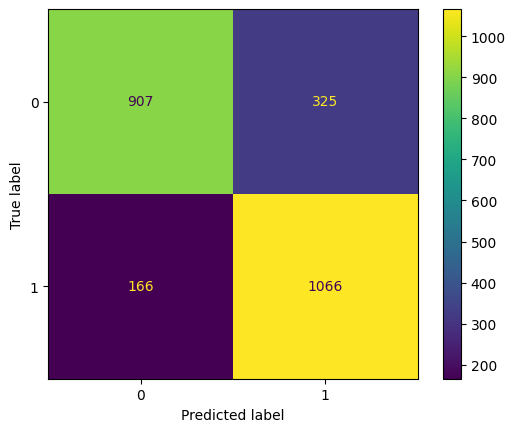

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
import seaborn as sns
y_prob_lr = lr_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

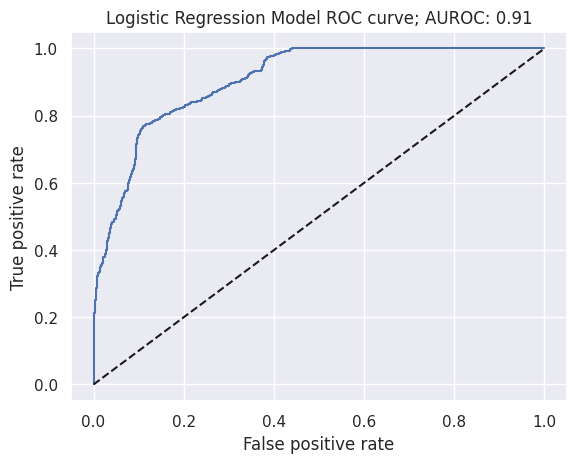

In [46]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_prob_lr), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()

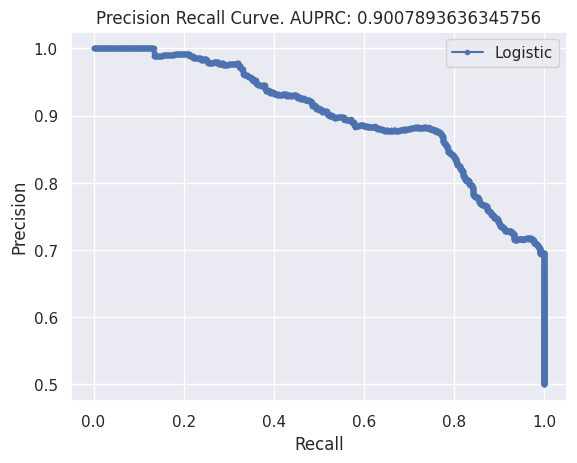

In [47]:
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_prob_lr)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)

plt.plot(recall, precision, marker='.', label='Logistic')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

# Random Forest

In [48]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [49]:
x_train = pd.concat([x_train, x_cv])
y_train = pd.concat([y_train, y_cv])

In [50]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
y_pred_rf = rf.predict(x_test)

In [52]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

precision_rf = precision_score(y_test, y_pred_rf)
print("Precision:", precision_rf)

recall_rf = recall_score(y_test, y_pred_rf)
print("Recall:", recall_rf)

f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
print("F1 Score:", f1_rf)

Accuracy: 0.9918831168831169
Precision: 0.9863563402889246
Recall: 0.997564935064935
F1 Score: 0.9919289749798225


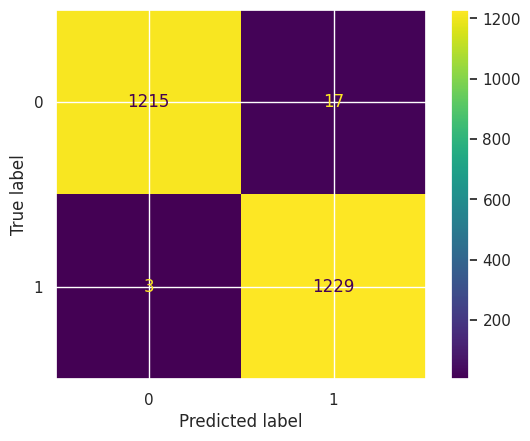

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

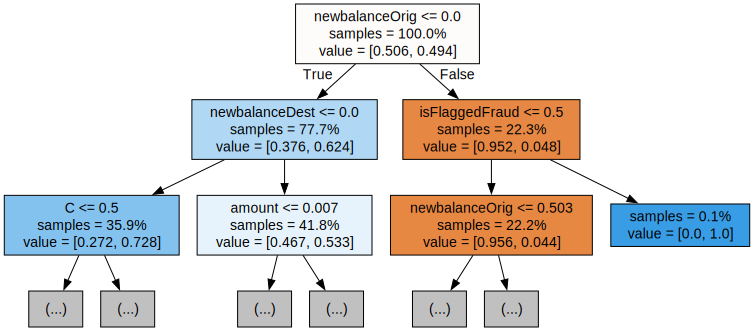

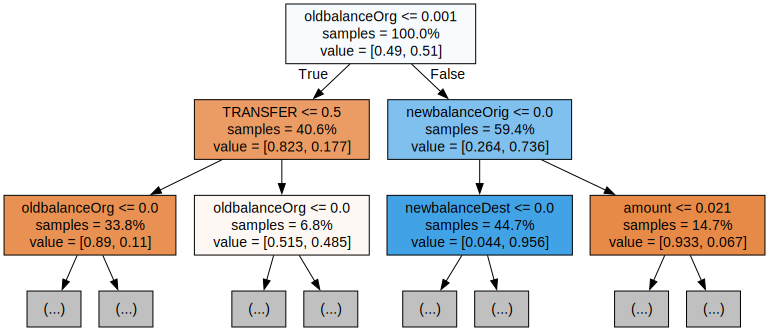

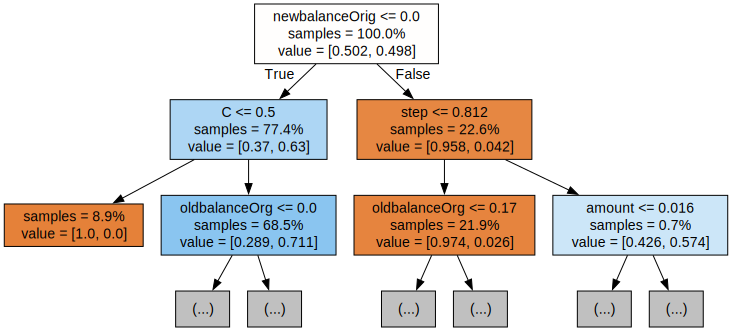

In [54]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [55]:
import seaborn as sns
y_prob_rf = rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

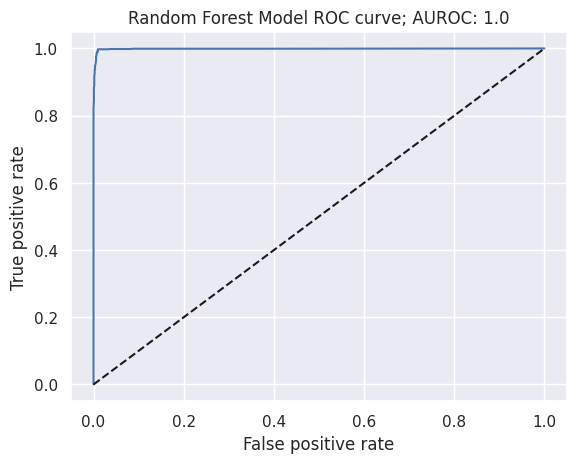

In [57]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_prob_rf), 2)

plt.title(f'Random Forest Model ROC curve; AUROC: {AUROC}');

plt.show()

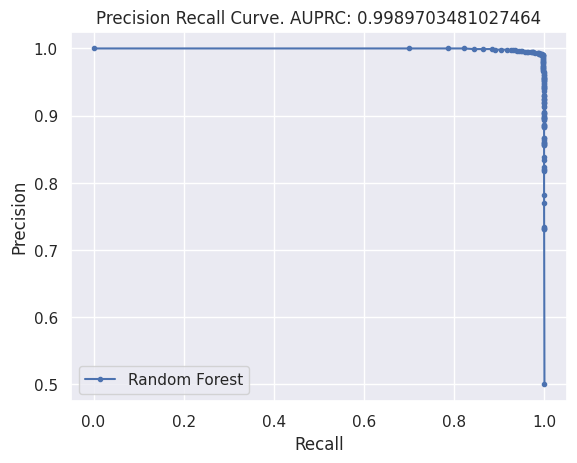

In [58]:
average_precision = average_precision_score(y_test, y_prob_rf)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)

plt.plot(recall, precision, marker='.', label='Random Forest')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

# XGBoost

In [59]:
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

In [60]:
# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [61]:
# make predictions on test data
y_pred_xg = xgb_clf.predict(x_test)

accuracy_xg = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy_xg)

precision_xg = precision_score(y_test, y_pred_xg)
print("Precision:", precision_xg)

recall_xg = recall_score(y_test, y_pred_xg)
print("Recall:", recall_xg)

f1_xg = 2 * (precision_xg * recall_xg) / (precision_xg + recall_xg)
print("F1 Score:", f1_xg)

Accuracy: 0.9882305194805194
Precision: 0.9815852682145717
Recall: 0.9951298701298701
F1 Score: 0.988311164852882


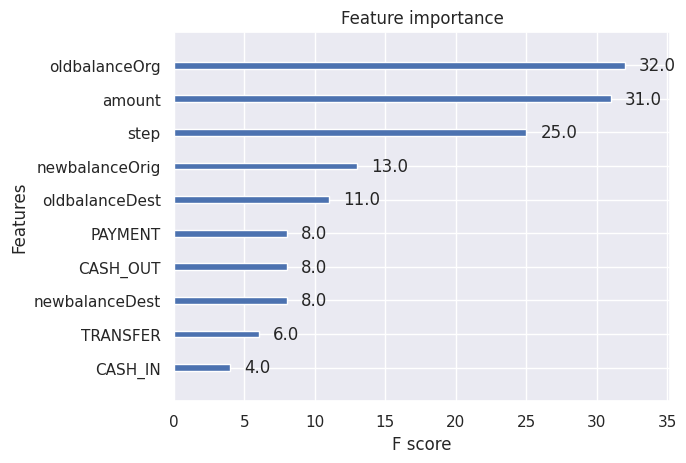

In [62]:
xg.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

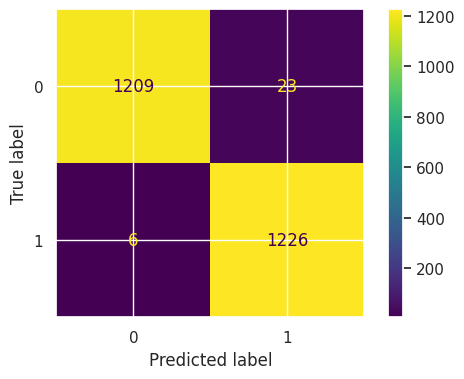

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xg)

In [64]:
y_prob_xg = xgb_clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xg)

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xg)

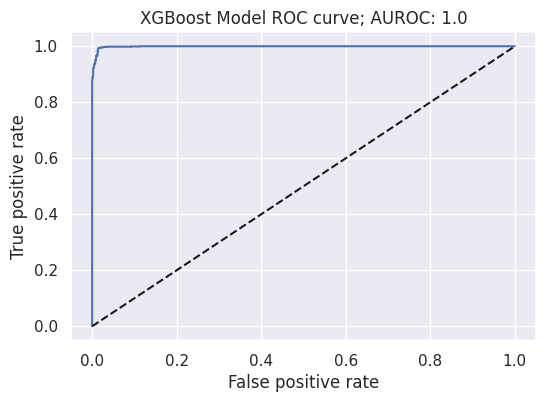

In [66]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_prob_xg), 2)

plt.title(f'XGBoost Model ROC curve; AUROC: {AUROC}');

plt.show()

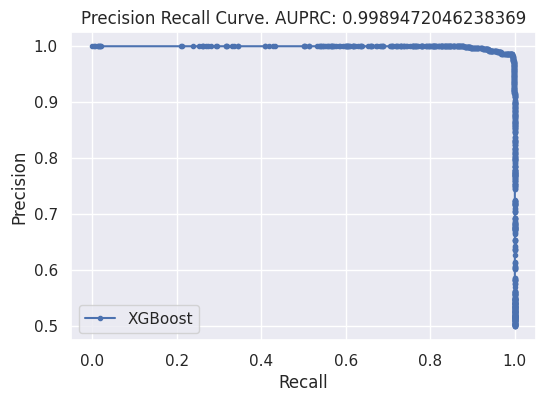

In [67]:
average_precision = average_precision_score(y_test, y_prob_xg)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_xg)

plt.plot(recall, precision, marker='.', label='XGBoost')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

# LightGBM

In [68]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [69]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 6981, number of negative: 6981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 13962, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [70]:
# predict the results
y_pred_lgbm=clf.predict(x_test)

In [71]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_lgbm, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgbm)))

LightGBM Model accuracy score: 0.9939


In [72]:
y_pred_train = clf.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [73]:
# Checking for overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9939


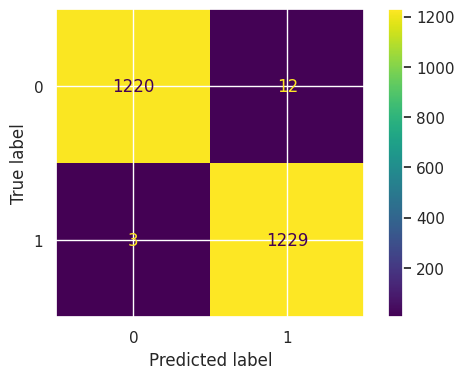

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm)

In [75]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1232
           1       0.99      1.00      0.99      1232

    accuracy                           0.99      2464
   macro avg       0.99      0.99      0.99      2464
weighted avg       0.99      0.99      0.99      2464



In [76]:
y_prob_lgbm = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgbm)

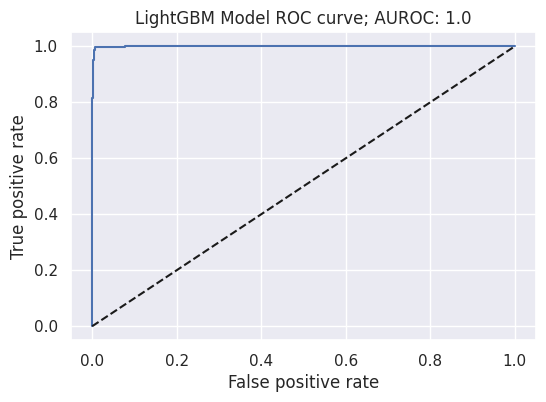

In [77]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_prob_lgbm), 2)

plt.title(f'LightGBM Model ROC curve; AUROC: {AUROC}');

plt.show()

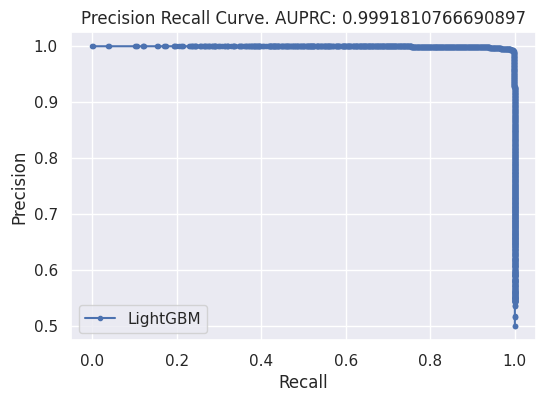

In [78]:
average_precision = average_precision_score(y_test, y_prob_lgbm)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lgbm)

plt.plot(recall, precision, marker='.', label='LightGBM')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

# Support Vector Machine (SVM)

In [79]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [80]:
svc = SVC(random_state=101, probability = True)
svc.fit(x_train,y_train)

accuracies = cross_val_score(svc,x_train,y_train,cv=5)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.8417131910824954
Test Score: 0.8319805194805194


In [81]:
y_pred_svm = svc.predict(x_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_lgbm)

precision_lgbm = precision_score(y_test, y_pred_svm)
print("Precision:", precision_lgbm)

recall_lgbm = recall_score(y_test, y_pred_svm)
print("Recall:", recall_lgbm)

f1_lgbm = 2 * (precision_lgbm * recall_lgbm) / (precision_lgbm + recall_lgbm)
print("F1 Score:", f1_lgbm)

Accuracy: 0.8319805194805194
Precision: 0.8773062730627307
Recall: 0.7719155844155844
F1 Score: 0.8212435233160622


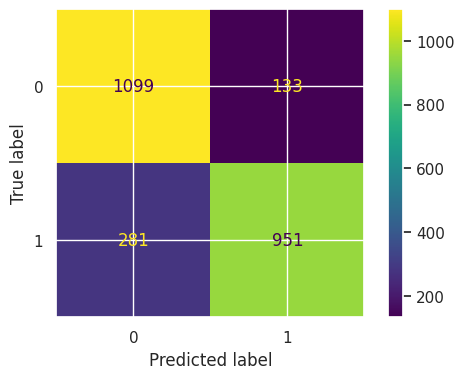

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

In [83]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1232
           1       0.88      0.77      0.82      1232

    accuracy                           0.83      2464
   macro avg       0.84      0.83      0.83      2464
weighted avg       0.84      0.83      0.83      2464



In [84]:
y_prob_svm = svc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

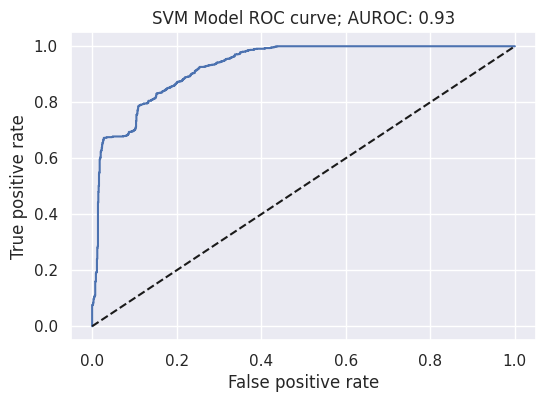

In [85]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_prob_svm), 2)

plt.title(f'SVM Model ROC curve; AUROC: {AUROC}');

plt.show()

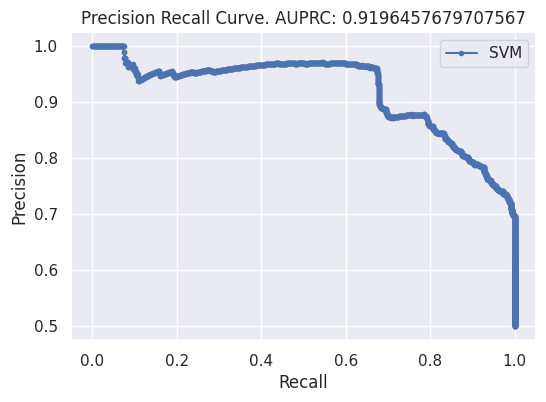

In [86]:
average_precision = average_precision_score(y_test, y_prob_svm)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_svm)

plt.plot(recall, precision, marker='.', label='SVM')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()

# Neural Networks

In [87]:
#first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-06-28 06:46:19.658106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 06:46:19.658172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 06:46:19.659741: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [88]:
model_nn = Sequential([
    Dense(13, activation ='relu'),
    Dense(5, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_nn.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
 101/1397 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7282 - loss: 0.6131

I0000 00:00:1719557185.242312    2128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719557185.257771    2128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1397/1397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7654 - loss: 0.4883
Epoch 2/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8236 - loss: 0.3370
Epoch 3/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8506 - loss: 0.3112
Epoch 4/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8640 - loss: 0.2889
Epoch 5/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8783 - loss: 0.2652
Epoch 6/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8897 - loss: 0.2441
Epoch 7/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8961 - loss: 0.2332
Epoch 8/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9036 - loss: 0.2256
Epoch 9/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9083 - loss: 0.2191
Epoch 10/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9101 - loss: 0.2101
Epoch 11/150
1397/1397 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9172 - loss: 0.1940
Epoch 12/150
1397/1397 ━━━━━━━━

In [89]:
tmp = y_test
tmp = tmp.reset_index()
tmp = tmp.drop("index", axis = 1)
tmp_arr = tmp.isFraud.to_numpy()
tmp_arr

array([1, 0, 1, ..., 0, 0, 0])

In [90]:
y_prob_nn = model_nn.predict(x_test)
y_prob_nn = y_prob_nn.flatten()
threshold = 0.5
y_pred_nn = (y_prob_nn >= threshold).astype(int)


accuracy_nn = accuracy_score(tmp_arr, y_pred_nn)
print("Accuracy:", accuracy_nn)

precision_nn = precision_score(tmp_arr, y_pred_nn)
print("Precision:", precision_nn)

recall_nn = recall_score(tmp_arr, y_pred_nn)
print("Recall:", recall_nn)

f1_nn = 2 * (precision_nn * recall_nn) / (precision_nn + recall_nn)
print("F1 Score:", f1_nn)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.9728084415584416
Precision: 0.9505027068832174
Recall: 0.997564935064935
F1 Score: 0.9734653465346534


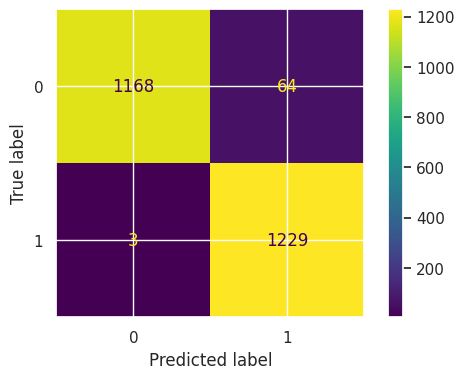

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn)

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nn)

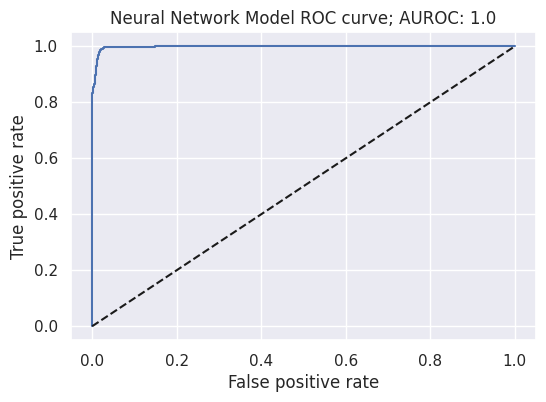

In [93]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_prob_nn), 2)

plt.title(f'Neural Network Model ROC curve; AUROC: {AUROC}');

plt.show()

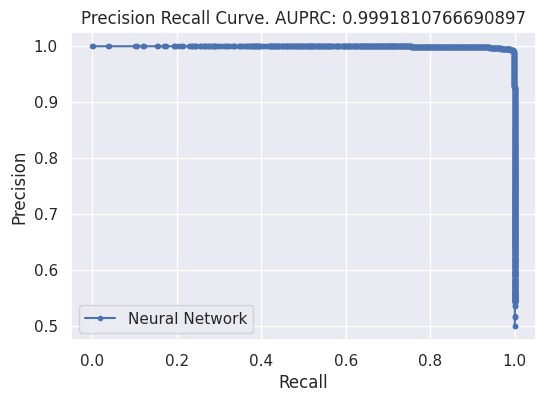

In [94]:
average_precision = average_precision_score(y_test, y_prob_lgbm)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lgbm)

plt.plot(recall, precision, marker='.', label='Neural Network')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.legend()

plt.title(f'Precision Recall Curve. AUPRC: {average_precision}')

plt.show()